In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

First we will read the data avaliable:

In [85]:
cal = pd.read_csv('./calendar.csv')
listing = pd.read_csv('./listings.csv')
review = pd.read_csv('./reviews.csv')

Next we will clead the data defining some functions to:<br> 
    - Trasnform the price value from string to float<br> 
    - Transform the date columns to a Pandas datetime columns<br> 
    - Finally set the columns that have True and False values as 't/f' to boolean Values os True and False

In [86]:
def price_to_numeric(price_str):
    try:
        return float(price_str[1:])
    except:
        return None

In [87]:
def percentage_to_numeric(pct_str):
    try:
        return float(pct_str[:-1])/100
    except:
        return None

In [88]:
def clean_calendar_df(df):
  # Cleans calendar.csv Pandas DataFrame
    
    df.date=pd.to_datetime(df.date)
    df.price=df.price.apply(lambda x: price_to_numeric(x))
    df.available=df.available.apply(lambda x: True if x=='t' else False)
    
    return df

In [89]:
def clean_listing_df(df,date_columns,t_f_columns,percent_columns,price_columns,age_columns):
  
   # Cleans listing.csv Pandas DataFrame

    for date_col in date_columns:
        df[date_col]=pd.to_datetime(df[date_col])
    
    for t_f_col in t_f_columns:
        df[t_f_col]=df[t_f_col].apply(lambda x: True if x=='t' else False)
        
    for percent_col in percent_columns:
        df[percent_col]=df[percent_col].apply(lambda x: percentage_to_numeric(x))
        
    for price_col in price_columns:
        df[price_col]=df[price_col].apply(lambda x: price_to_numeric(x))
        
    for age_col in age_columns:
        df[age_col+'_age']=(listing.last_scraped-listing[age_col]).dt.days

    df=df.dropna(how='all',axis=1)    
    return df

In [90]:
cal=clean_calendar_df(cal)

In [91]:
date_columns_listing=['last_scraped','host_since','calendar_last_scraped','first_review','last_review']

true_false_listing_columns=['host_is_superhost','host_has_profile_pic','host_identity_verified',
                            'is_location_exact','has_availability','requires_license','instant_bookable',
                            'require_guest_profile_picture','require_guest_phone_verification']

percentage_columns_listing=['host_response_rate','host_acceptance_rate']

price_columns_listing=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']

age_columns_listing=['host_since','first_review','last_review']


listing=clean_listing_df(listing,
                         date_columns_listing,
                         true_false_listing_columns,
                         percentage_columns_listing,
                         price_columns_listing,
                        age_columns_listing)

Examining the listing DataFrame:

In [92]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_age,first_review_age,last_review_age
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,WASHINGTON,False,moderate,False,False,2,4.07,1607.0,1525.0,2.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,True,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,NaN,NaN,100.0,40.0,1,0.0,2,90,today,True,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,WASHINGTON,False,strict,True,True,6,1.48,1047.0,868.0

In [93]:
listing.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_since_age,first_review_age,last_review_age
count,3.818000e+03,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3817.000000,1534.000000,121.000000,1813.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000,3816.000000,3191.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,0.948868,0.999672,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.747708,567.557366,825.677686,254.484832,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,837.273585,407.743027,74.533375
std,2.962660e+06,0.000000e+00,1.458382e+07,0.118667,0.018122,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,89.150860,198.496058,113.002892,149.748562,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348,569.795123,402.669792,112.619230
min,3.335000e+03,2.016010e+13,4.193000e+03,0.170000,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,1.000000,1.000000,1.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,0.980000,1.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,413.500000,750.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000,355.000000,134.000000,15.000000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,550.000000,850.000000,200.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000,752.500000,232.000000,40.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,1.000000,1.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,700.000000,900.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000,1235.000000,553.500000,99.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,1.000000,1.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,999.000000,999.000000,995.000000,995.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000,2611.000000,2402.000000,1570.000000


Examining the calendar DataFrame:

In [94]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


## Question Calendar - how are prices year-long - are they going up?

We are going to check out how is the price varying through out the year

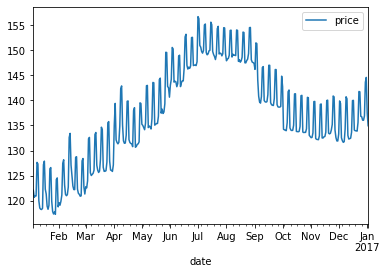

In [95]:
cal.groupby(['date']).agg({'price':'mean'}).plot()

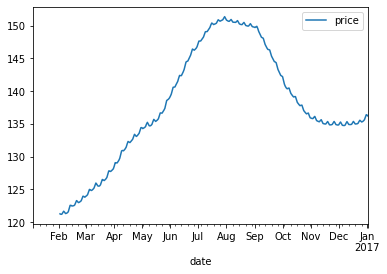

In [96]:
cal.groupby(['date']).agg({'price':'mean'}).rolling(window=30).mean().plot()

With a rolling average of 30 days we can smooth the trend and realize that during the months of July to September the pices peak considerably, going from `$ 120` reaching more than `$150`.<br>
Moreover,comparing the beginning of the year of 2017 and the begining of 2016 we can also see that prices gone up 12.5%

## Questions Listing

What ate the characteristics of the Seatle airbnb market? What neighbourhoods have most listings, how are the prices in different places and what kind of property is listed? <br>
We are now going to find out more about them:

We can see below the basically the Seatle market is distributed in Apartments and Houses:

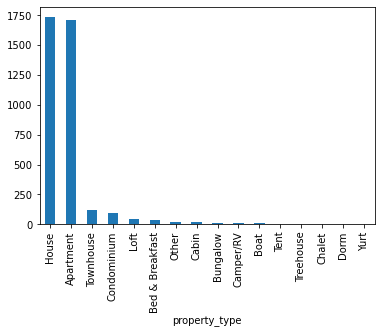

In [97]:
listing.groupby('property_type').count().sort_values(by='id',ascending=False).id.plot.bar()

Entire home/apt is much more common than the other modalities (private/shared room):

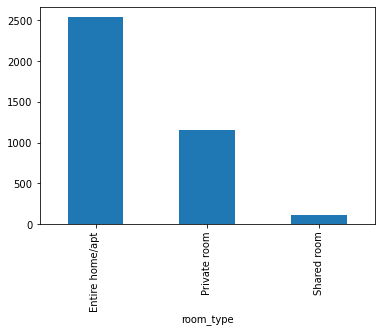

In [98]:
listing.groupby('room_type').count().sort_values(by='id',ascending=False).id.plot.bar()

The neighbourhood that have most listing is Capitol Hill:

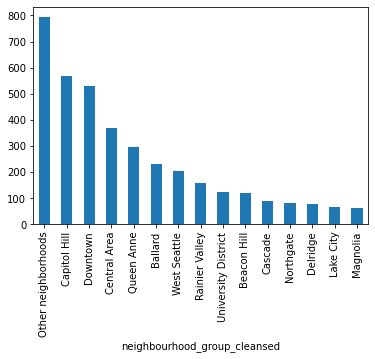

In [99]:
listing.groupby('neighbourhood_group_cleansed').count().sort_values(by='id',ascending=False).head(15).id.plot.bar()

The most expensive neighbourhhor is Magnolia:

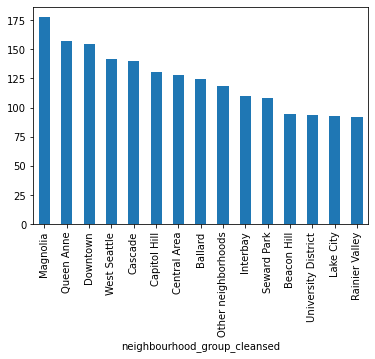

In [100]:
listing.groupby('neighbourhood_group_cleansed').mean().sort_values(by='price',ascending=False).head(15).price.plot.bar()

But if we look at the rates per person (price divided by the number of guests included) we can see that actually downtown is a little bit more expensive

In [101]:
listing['price_per_person']=listing['price']/listing['guests_included']

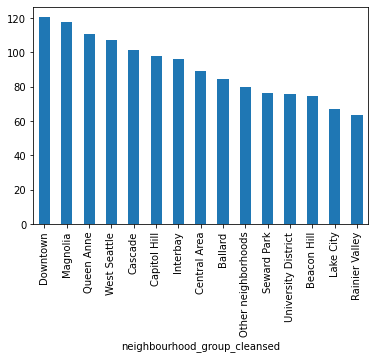

In [109]:
#removing 0's in guest included 
listing[listing.guests_included>0].groupby('neighbourhood_group_cleansed'
               ).mean().sort_values(by='price_per_person',ascending=False).head(15).price_per_person.plot.bar()

Finally we can see where the most expensive areas are located in relation tothe other ones.
The southside of Seatle and downtow are the most expensive areas whereas the noth side is cheaper:

In [131]:
price_heat_map=listing.groupby(['neighbourhood_group_cleansed']).mean().reset_index()

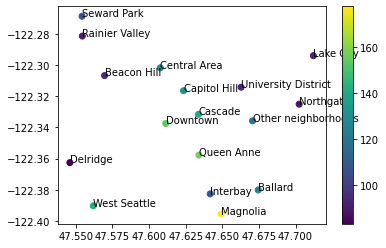

In [136]:
fig, ax = plt.subplots()
plt.scatter(price_heat_map.latitude,
            price_heat_map.longitude, 
            c=price_heat_map.price, 
            )

for i in price_heat_map.iterrows():
    ax.annotate(i[1].neighbourhood_group_cleansed,(i[1].latitude,i[1].longitude))

plt.colorbar()
plt.show()

By looking at the date we'll notice some columns are mere indicators of the listing id such as url, pictures_url as so on.
Others are highly descriptive and are to cumbersome to use as comparisson such as neighborhood_overview,transit, etc

We will define the columns that have well defined cetegories such as host_response_time and true/false columns

In [40]:
categorical_listing=['host_response_time',
                     'host_is_superhost',
                     'host_neighbourhood',
                     'neighbourhood',
                     'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'is_location_exact',
                     'property_type',
                     'room_type',
                     'bed_type',
                     'calendar_updated',
                     'has_availability',
                     'instant_bookable',
                     'cancellation_policy',
                     'require_guest_profile_picture',
                     'require_guest_phone_verification'
                    ]

In [41]:
numerics = ['int32', 'int64', 'float64']

numeric_listing =list(listing.select_dtypes(include=numerics).columns)

In [42]:
numeric_listing

['id',
 'scrape_id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_since_age',
 'first_review_age',
 'last_review_age',
 'price_per_person']

By plotting the corretation heatmap we can see that the mais factors that are correlated to price are the ones related to the size of the acommodation (sq feet, bathroom, bedrooms, etc)

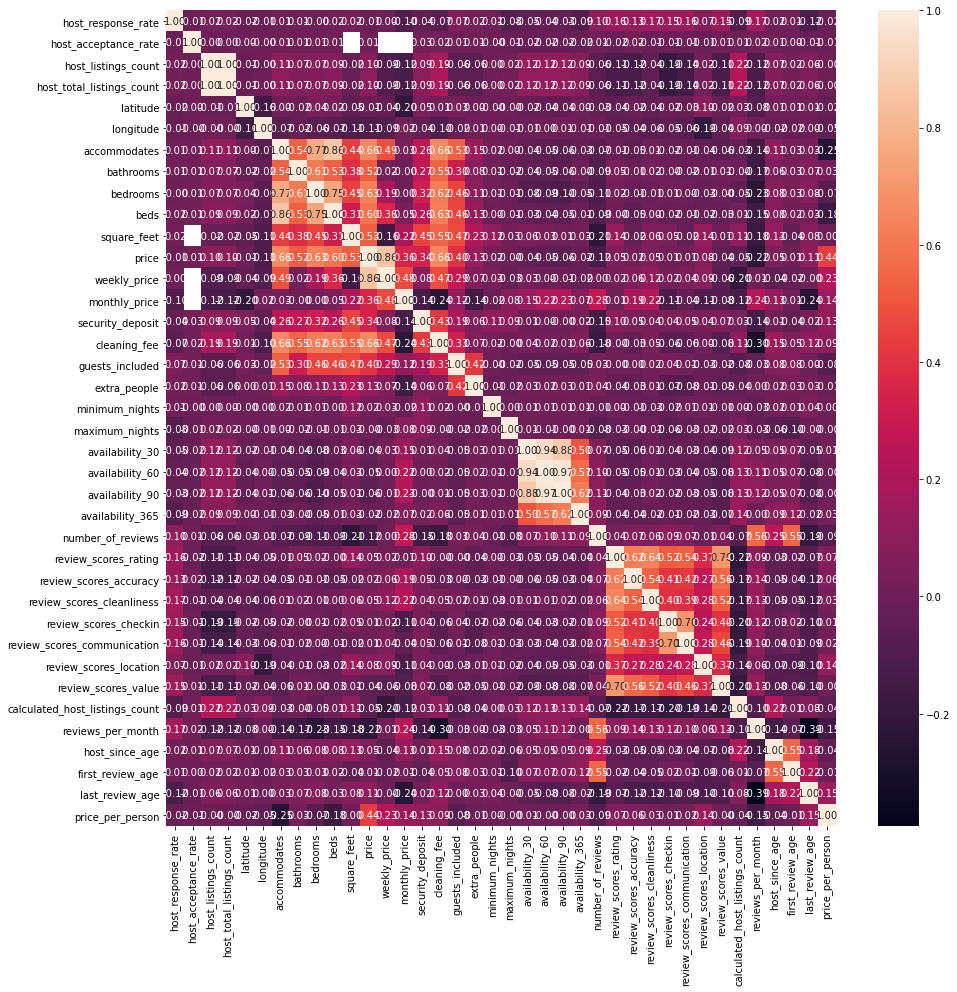

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(listing[numeric_listing].drop(columns=['scrape_id','host_id','id']).corr(), annot=True, fmt=".2f")

Now we will make a lineal model to predict the price based on the numeric values as well as the categorical values:

In [69]:
def clean_data_regression(df,num_vars,cat_vars):

    # Drop rows with missing price values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
        
    # fill nan values with the mean
    
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
 
df_listing=listing[numeric_listing+categorical_listing].copy()  
X, y = clean_data_regression(df_listing,numeric_listing,categorical_listing)

C:\Users\bruno\anaconda3\envs\py37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [71]:
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

LinearRegression(normalize=True)

In [72]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

The factors that most define priceing are the ones related to the location of the linsting:

In [73]:
coef_df

,est_int,coefs,abs_coefs
91,host_neighbourhood_Kaanapali,1.206953e+02,1.206953e+02
188,neighbourhood_Meadowbrook,-1.067688e+02,1.067688e+02
104,host_neighbourhood_Meadowbrook,1.005793e+02,1.005793e+02
53,host_neighbourhood_Brighton,-9.999824e+01,9.999824e+01
151,neighbourhood_Brighton,9.999824e+01,9.999824e+01
...,...,...,...
26,availability_365,4.043467e-17,4.043467e-17
22,maximum_nights,-1.103049e-18,1.103049e-18
0,id,-5.766858e-21,5.766858e-21
2,host_id,-1.759381e-21,1.759381e-21


In [74]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#append the r2 value from the test set
r2_scores_train=r2_score(y_train, y_train_preds)
r2_scores_test=r2_score(y_test, y_test_preds)

The model fits really well to the variables selected, maybe indicating some overfitting due the mean filling of na values:

In [75]:
r2_scores_test

0.9930006183131791

In [76]:
r2_scores_train

0.999992176522993